<a href="https://colab.research.google.com/github/Fuzailsheikh786/machine-learning-lab/blob/main/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = np.array([
    [2.5,2.4,1.2],
    [0.2,0.7,0.3],
    [2.2,2.9,1.4],
    [1.9,2.2,1.1],
    [3.1,3.0,1.7],
    [5.3,4.0,3.7],
    [6.9,5.8,6.3],
    [3.5,5.6,7.1],
    [3.8,5.4,2.5],
    [2.2,4.4,5.5]
])
df = pd.DataFrame(data, columns=['X','Y','Z'])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.2,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,5.3,4.0,3.7
6,6.9,5.8,6.3
7,3.5,5.6,7.1
8,3.8,5.4,2.5
9,2.2,4.4,5.5


In [5]:
standardized_data = (df - df.mean()) / df.std()
standardized_data

,X,Y,Z
0,-0.351537,-0.736323,-0.774597
1,-1.576591,-1.745799,-1.145414
2,-0.511327,-0.439419,-0.692193
3,-0.671116,-0.855085,-0.815799
4,-0.031958,-0.380038,-0.568587
5,1.139833,0.213771,0.255452
6,1.992044,1.282628,1.326703
7,0.181095,1.163866,1.656318
8,0.340885,1.045104,-0.238971
9,-0.511327,0.451295,0.997087


In [6]:
cov_matrix = np.cov(standardized_data.T)
cov_matrix

array([[1.        , 0.77299266, 0.62671411],
       [0.77299266, 1.        , 0.85245313],
       [0.62671411, 0.85245313, 1.        ]])

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs

(array([2.50521718, 0.38045346, 0.11432937]),
 array([[ 0.55040799,  0.77865903,  0.30123273],
        [ 0.6071882 , -0.12568771, -0.78455407],
        [ 0.57303886, -0.61472979,  0.5419721 ]]))

In [8]:
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_indices
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]
eig_vals, eig_vecs

(array([2.50521718, 0.38045346, 0.11432937]),
 array([[ 0.55040799,  0.77865903,  0.30123273],
        [ 0.6071882 , -0.12568771, -0.78455407],
        [ 0.57303886, -0.61472979,  0.5419721 ]]))

In [9]:
eig_vecs_subset = eig_vecs[:, :2]
eig_vecs_subset

array([[ 0.55040799,  0.77865903],
       [ 0.6071882 , -0.12568771],
       [ 0.57303886, -0.61472979]])

In [11]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df

,PC1,PC2
0,-1.084450,0.294987
1,-2.584164,-0.304081
2,-0.944902,0.082592
3,-1.356070,0.086399
4,-0.574167,0.372409
5,0.903556,0.703638
6,2.635486,0.574349
7,1.755497,-1.023461
8,0.685261,0.280979
9,0.563952,-1.067811


In [12]:
print("\n Reduced Data (after PCA):\n", reduced_df)


 Reduced Data (after PCA):
         PC1       PC2
0 -1.084450  0.294987
1 -2.584164 -0.304081
2 -0.944902  0.082592
3 -1.356070  0.086399
4 -0.574167  0.372409
5  0.903556  0.703638
6  2.635486  0.574349
7  1.755497 -1.023461
8  0.685261  0.280979
9  0.563952 -1.067811


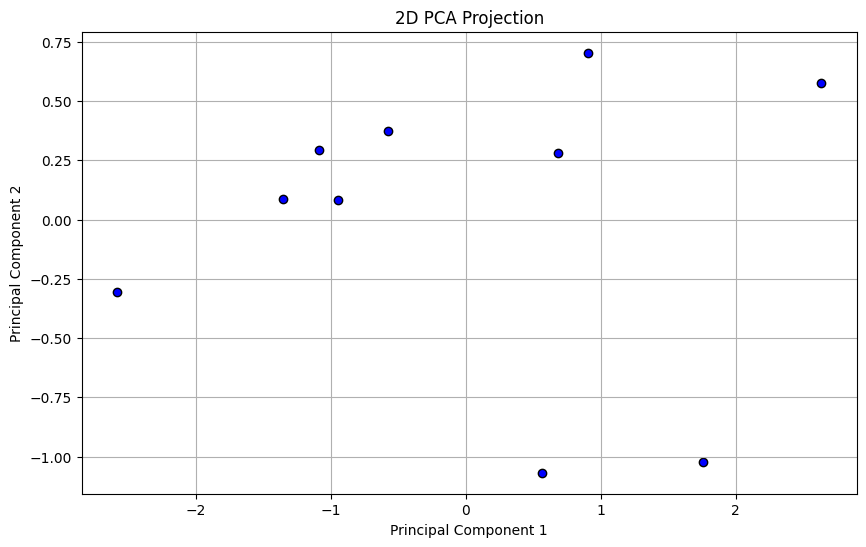

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color = 'blue', edgecolors='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()